# Udacity Blog post - Analysis on the 2021 Stackoverflow survey

I will be using the Crisp DM process to translate the data into understandable figures for stakeholders to read.

These stages are:
    
1) Business Understanding

2) Data Understanding

3) Prepare Data

4) Data Modeling

5) Evaluate the Results

6) Deploy

## Business Understanding

The business questions I will be answering are as follows:
    
1)  What was the average annual compensation for the top 3 most commonly worked with languages?

2) For the top 5 countries with the most respondents, what was the respective average annual compensation?

3) How does average annual compensation vary across gender?


## Data Understanding

In [1]:
#Load the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

#Ensure csv stored as dataframe
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
#Check shape of dataframe
print(df.shape)

(83439, 48)


In [4]:
# General info on the dataframe
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [5]:
#Check the data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [6]:
df.isna().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [7]:
#Columns with no nulls
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'MainBranch', 'ResponseId', 'Country'}


So only 3 of the columns have no nulls, but as I choose the the columns I want I can find out the number of nulls in that specific column. 


# Question 1: What was the average annual compensation for the top 3 most commonly worked with languages?
    

## Prepare the data 

In [8]:
#Work out the proportion of null values in the languages worked with column

df['LanguageHaveWorkedWith'].isnull().mean()


0.012967557137549587

In [9]:
#Work out the proportion of null values in the Annual compensation column

df['ConvertedCompYearly'].isnull().mean()


0.4385838756456813

The languages worked with column has a pretty low volume of nulls, but the 'Converted comp' column is about 43% nulls. To avoid bias in my analysis I will not be imputing any null values as certain columns had a 'prefer not to say' option. If I were to fill these in there would be bias. In this notebook I am hoping to show the raw values fed back, another reason why I will not be imputing any values. 

In [10]:
#Quick view of the responses

lang = df['LanguageHaveWorkedWith'].value_counts()

lang


Python                                                                               1337
HTML/CSS;JavaScript;Node.js;TypeScript                                                811
Java                                                                                  715
HTML/CSS;JavaScript;PHP;SQL                                                           674
C#                                                                                    597
                                                                                     ... 
C++;COBOL;Java;JavaScript;Python;SQL;VBA                                                1
C++;Dart;Go;HTML/CSS;Java;JavaScript;Node.js;Perl;PHP;Python;Scala;SQL;TypeScript       1
C;HTML/CSS;JavaScript;Matlab;PHP;Python;SQL                                             1
Crystal;Elixir;Ruby;SQL                                                                 1
C;Dart;Java;JavaScript;Objective-C;SQL;Swift                                            1
Name: Lang

In [11]:
#Top 3 most popular languages

top_3_lang = lang.nlargest(n=3)

top_3_lang

Python                                    1337
HTML/CSS;JavaScript;Node.js;TypeScript     811
Java                                       715
Name: LanguageHaveWorkedWith, dtype: int64

From this I have my top 3 languages worked with that I will be using to work out the average annual compensation. 

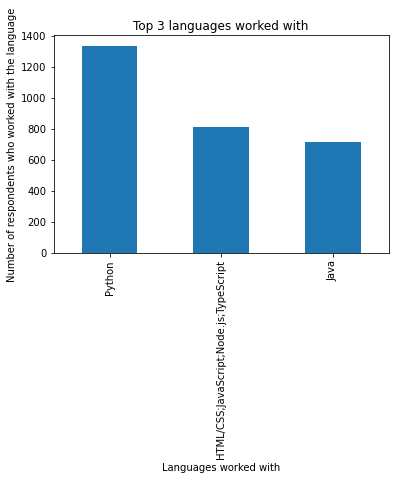

In [12]:
top_3_lang.plot(kind = 'bar')
plt.xlabel("Languages worked with")
plt.ylabel("Number of respondents who worked with the language")
plt.title("Top 3 languages worked with")
plt.show()

In [13]:
#Create a new dataframe for the top 3 most used languages and the mean annual compensation

Bestpaid = pd.DataFrame(df.query("LanguageHaveWorkedWith == ['Python', 'HTML/CSS;JavaScript;Node.js;TypeScript', 'Java']").groupby(df['LanguageHaveWorkedWith']).mean()['ConvertedCompYearly'], dtype=object)

In [14]:
#View the data frame 

Bestpaid

,ConvertedCompYearly
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;Node.js;TypeScript,88961.9
Java,79037.2
Python,129602


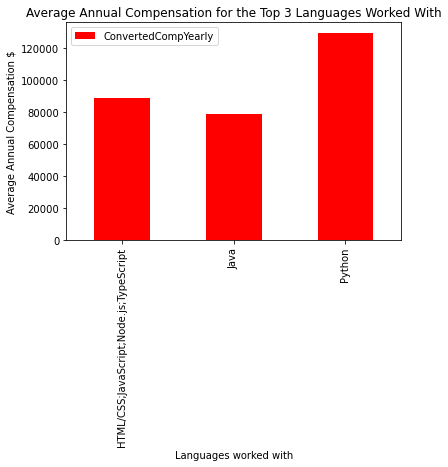

In [15]:
#Plot the data frame as a bar chart

Bestpaid.plot(kind = "bar", color= 'red')
plt.xlabel("Languages worked with")
plt.ylabel("Average Annual Compensation $")
plt.title("Average Annual Compensation for the Top 3 Languages Worked With")
plt.show()

## Evaluate results

From the bar plot above, we can see that those that have worked with Python have the highest overall mean compensation, at over $120,000 a year.

# Question 2: For the top 5 countries with the most respondents, what was respective the average annual compensation?

## Prepare the data

In [16]:
#Check how many nulls there are

df['Country'].isnull().mean()

0.0

We can see there are no nulls so none of the data needs to be imputed

In [17]:
#View the countries

countries = df['Country'].value_counts()

countries

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Liechtenstein                                               1
Papua New Guinea                                            1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Saint Kitts and Nevis                                       1
Name: Country, Length: 181, dtype: int64

In [18]:
#Top 5 countries that responded to the survey

top_countries = countries.nlargest(n=5)

top_countries

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
Name: Country, dtype: int64

Now we have the top 5 countries that responded, we can start to plot the graphs for our answers.

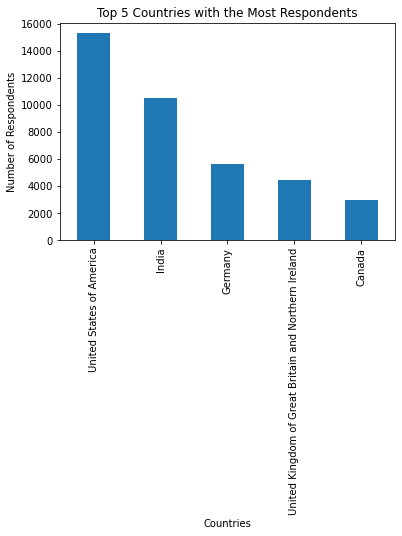

In [19]:
#Plot the top 5 countries to view the data

top_countries.plot(kind = 'bar')
plt.xlabel("Countries")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Countries with the Most Respondents")
plt.show()

In [20]:
# Create a dataframe to get the average annual compensation for the top 5 countries that responded

Salary = pd.DataFrame(df.query("Country == ['United States of America', 'India', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Canada']").groupby(df['Country']).mean()['ConvertedCompYearly'], dtype=object)

In [21]:
# View data frame 

Salary

,ConvertedCompYearly
Country,
Canada,135733
Germany,103015
India,42522.6
United Kingdom of Great Britain and Northern Ireland,141689
United States of America,262994


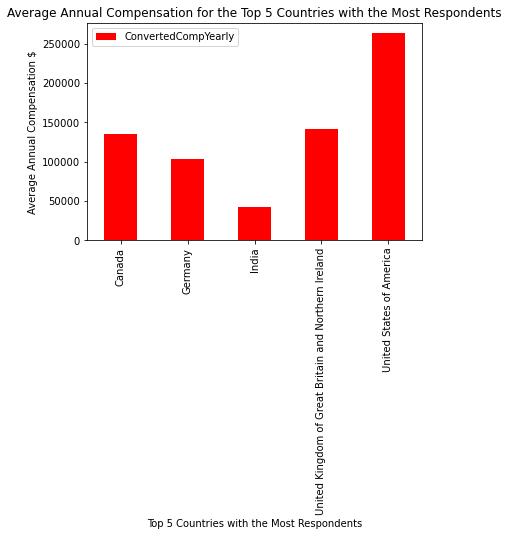

In [22]:
# Plot the dataframe

Salary.plot(kind = 'bar', color= 'red')
plt.xlabel("Top 5 Countries with the Most Respondents")
plt.ylabel("Average Annual Compensation $")
plt.title("Average Annual Compensation for the Top 5 Countries with the Most Respondents")
plt.show()

# Evaluate

From the reults of the bar plot we can see that the United States of America has the highest average compensation for those that completed the survey. India had the lowest average annual compensation, with about $220500 less a year.

# Question 3: How does average annual compensation vary across gender?

## Prepare the data

In [23]:
#Check how many nulls there are

df['Gender'].isnull().mean()

0.013818478169680844

In [24]:
#Take a look at the values

gend = df['Gender'].value_counts()
gend

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              21
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        

We can see here that there are lots of variants to the answers so I cleaned that up and put them all into 'Mixed answers'. As the extra parts are after the semi colons I removed the parts after that.

In [25]:
#Clean up the responses 

df['Gender'] = df['Gender'].replace(to_replace=r'(.*;.*)', value='Mixed answers', regex=True)

In [26]:
#Take another look

gend = df['Gender'].value_counts()
gend

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Mixed answers                                          804
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

Now it is a lot cleaner and easier to interpret

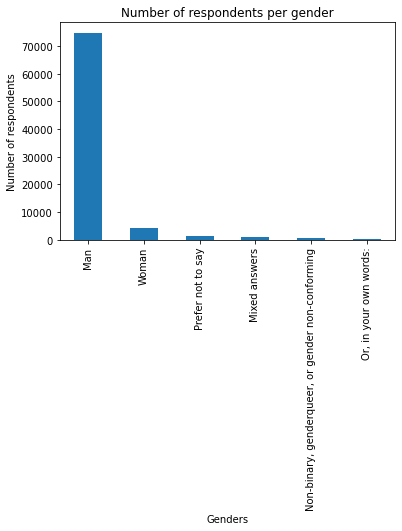

In [27]:
def bar(column_name):
    '''Returns a bar plot for the counts of each series in a column
    
    Input:
    column_name in this case 'Gender'
        
    Output:
    The value counts plotted as a bar plot '''

df['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Genders")
plt.ylabel("Number of respondents")
plt.title("Number of respondents per gender")
plt.show()       

In [29]:
#Take a look at the yearly compensation 

yearcomp = df['ConvertedCompYearly'].value_counts()
yearcomp

150000.0    450
120000.0    430
100000.0    380
64859.0     311
200000.0    308
           ... 
35928.0       1
18672.0       1
9717.0        1
110502.0      1
65532.0       1
Name: ConvertedCompYearly, Length: 8735, dtype: int64

In [30]:
#Make a new dataframe to get the mean yearly compensation for the genders

Salaries = pd.DataFrame(df.query("Gender == ['Man', 'Woman', 'Prefer not to say', 'Mixed answers', 'Non-binary, genderqueer, or gender non-conforming', 'Or, in your own words:']").groupby(df['Gender']).mean()['ConvertedCompYearly'], dtype=object)

In [31]:
#View data frame 

Salaries

,ConvertedCompYearly
Gender,
Man,115584
Mixed answers,205873
"Non-binary, genderqueer, or gender non-conforming",157788
"Or, in your own words:",111147
Prefer not to say,185249
Woman,105387


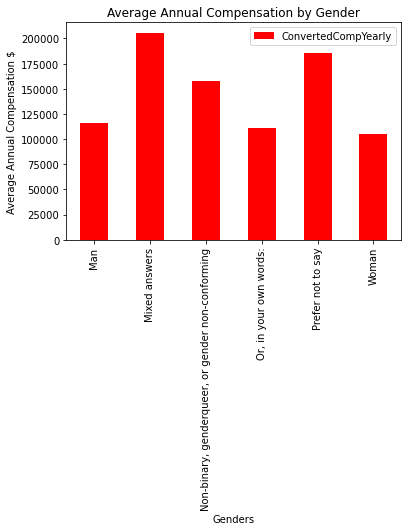

In [32]:
#Plot the mean Salaries per gender

Salaries.plot(kind = "bar", color = 'red')
plt.xlabel("Genders")
plt.ylabel("Average Annual Compensation $")
plt.title("Average Annual Compensation by Gender")
plt.show()

## Evaluate
From the results and from the people who specified their gender we can see that women were the least well paid, men and those who decided to articulate their gender in their own words were the second and third least well paid. Those who had mutiple answers were the best paid. 